In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#loading datasets
df = pd.read_csv("ptdf_scholarship_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10130 entries, 0 to 10129
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Fullname          9210 non-null   object
 1   Gender            7368 non-null   object
 2   State             9210 non-null   object
 3   Sponsorship_Type  9210 non-null   object
 4   University        8289 non-null   object
 5   Action            9210 non-null   object
dtypes: object(6)
memory usage: 475.0+ KB


In [4]:
df.Sponsorship_Type.unique()

array(['PhD', nan], dtype=object)

In [5]:
df.isna().sum()

Fullname             920
Gender              2762
State                920
Sponsorship_Type     920
University          1841
Action               920
dtype: int64

In [6]:
df.Gender.nunique()

1

In [7]:
df.University.unique()

array([nan, 'University of Dundee', 'Durham University',
       'Imperial College London', 'Robert Gordon University',
       'University of Strathclyde', 'University of Birmingham'],
      dtype=object)

In [8]:
df["University"].value_counts()

University of Dundee         2763
Robert Gordon University     1842
Durham University             921
Imperial College London       921
University of Strathclyde     921
University of Birmingham      921
Name: University, dtype: int64

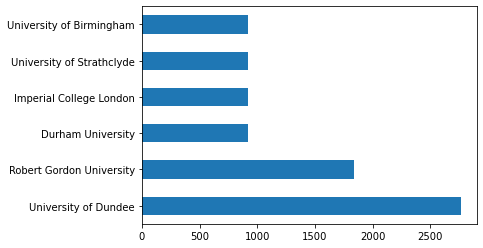

In [9]:
df["University"].value_counts().plot(kind="barh");

##### Cleaning the data

In [10]:
df.drop(columns=["Gender", "Fullname"], inplace=True)

In [11]:
df.University.fillna("Not Know", inplace =True)

In [12]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
df.drop(rows_with_nan, inplace=True)

In [13]:
df.isnull().sum()

State               0
Sponsorship_Type    0
University          0
Action              0
dtype: int64

In [14]:
df.to_csv("clean_ptdf_scholarship.csv")

***After inspecting the data, I found that we had 920 empty rows, the gender column also had on unique value which is male. The University column also had 921 nulls. So I filled that with a place holder "Not Know". Since the gender column was having one unique value, I dropped that column and the Rank column. Also I filtered out the empty rows index and remove them. We now have a cleaned data ready for analysis. I also dropped the full name column***

### Exploratory Analysis

#### Research Questions

> - What is the university distribution of the scholarship

> - What is the state distribution of the scholarhip


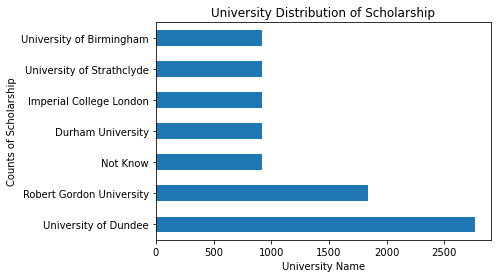

In [20]:
df["University"].value_counts().plot(kind="barh")
plt.xlabel("University Name")
plt.ylabel("Counts of Scholarship")
plt.title("University Distribution of Scholarship");

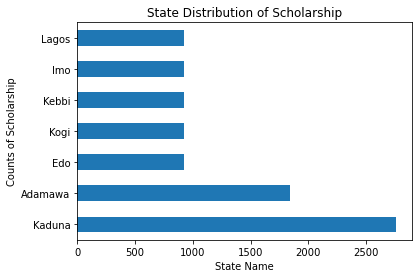

In [21]:
df["State"].value_counts().plot(kind="barh")
plt.xlabel("State Name")
plt.ylabel("Counts of Scholarship")
plt.title("State Distribution of Scholarship");